# Programming Assignment 3: Approximation Algorithms
## Imports

In [1]:
from random import randint

import networkx as nx
from matplotlib import pyplot as plt

## Problem 1: Max-cut Problem

In [2]:
def draw_graph(n, edge_list, node_set_flag, set1_color="lightblue", set2_color="red"):
    # Get the list of nodes in various sets and edges that are cut and uncut
    set1_nodes = [i for i in range(1, n + 1) if node_set_flag[i - 1]]
    set2_nodes = [i for i in range(1, n + 1) if not node_set_flag[i - 1]]

    edge_list_not_cut = [(i, j) for i, j in edge_list if node_set_flag[i - 1] == node_set_flag[j - 1]]
    edge_list_cut = [(i, j) for i, j in edge_list if node_set_flag[i - 1] != node_set_flag[j - 1]]

    # Draw the graph
    G = nx.Graph()  # noqa: N806
    G.add_edges_from(edge_list)

    _, ax = plt.subplots()
    pos = nx.spring_layout(G, seed=1234)
    nx.draw_networkx_nodes(G, pos, nodelist=set1_nodes, node_color=set1_color, ax=ax)
    if len(set2_nodes) >= 1:
        nx.draw_networkx_nodes(G, pos, nodelist=set2_nodes, node_color=set2_color, alpha=0.5, ax=ax)

    labels = {i: i for i in range(1, n + 1)}
    nx.draw_networkx_labels(G, pos, labels=labels, ax=ax)
    nx.draw_networkx_edges(G, pos, width=2, edgelist=edge_list_not_cut, ax=ax)
    nx.draw_networkx_edges(G, pos, width=2, edgelist=edge_list_cut, edge_color="red", ax=ax)

    plt.show()

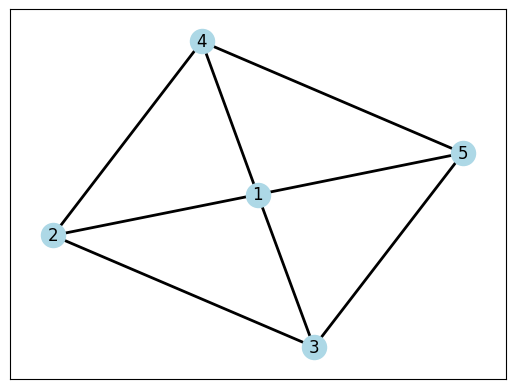

In [3]:
n = 5
edges = [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5), (4, 5)]
node_set_flag = [True] * n  # All nodes are in set1
draw_graph(n, edges, node_set_flag)

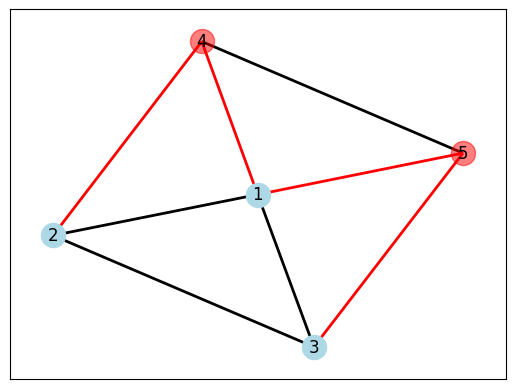

In [4]:
n = 5
edges = [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5), (4, 5)]
node_set_flag = [True, True, True, False, False]  # 1, 2, 3 are in set1
draw_graph(n, edges, node_set_flag)

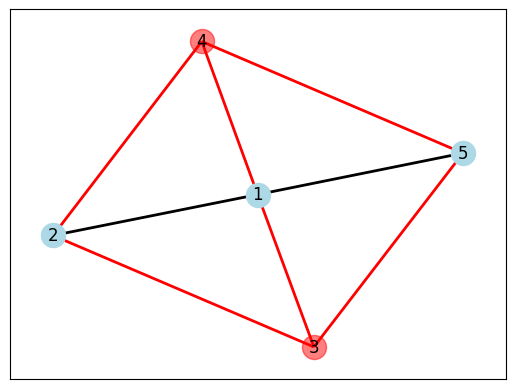

In [5]:
n = 5
edges = [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5), (4, 5)]
node_set_flag = [True, True, False, False, True]  # 1, 2, 5 are in set1
draw_graph(n, edges, node_set_flag)

In [6]:
def vertex_edge_counts(vertex, adj_list, cut):
    black_edges = sum(cut[vertex] == cut[neighbor] for neighbor in adj_list[vertex])
    red_edges = len(adj_list[vertex]) - black_edges
    return black_edges, red_edges


def flip_vertex(vertex, adj_list, cut, edge_counts, imbalanced):
    for neighbor in adj_list[vertex]:
        black, red = edge_counts[neighbor]
        if cut[vertex] == cut[neighbor]:
            edge_counts[neighbor] = (black - 1, red + 1)
        else:
            edge_counts[neighbor] = (black + 1, red - 1)

        if edge_counts[neighbor][0] > edge_counts[neighbor][1]:
            imbalanced.add(neighbor)
        else:
            imbalanced.discard(neighbor)

    black, red = edge_counts[vertex]
    edge_counts[vertex] = (red, black)
    cut[vertex] = not cut[vertex]

    return cut, edge_counts, imbalanced


# This is the function that you will implement the greedy algorithm.
# It should input a graph as an adjacency list and return a partition where
# every vertex is balanced, as described above.
# Return a list of Booleans of size n, wherein for any vertex v, if list[v] = True
# then it belongs to partition S1 otherwise to partition S2.
def find_balanced_cut(n, adj_list):
    assert n >= 1
    assert len(adj_list) == n

    # Check that the adjacency list makes sense and represents a directed graph
    for i, neighbors in enumerate(adj_list):
        assert i not in neighbors  # No self loops allowed
        assert all(0 <= j < n for j in neighbors)
        assert all(i in adj_list[j] for j in neighbors)

    # Start with an initial cut that places first n/2 nodes in S1 and rest in S2
    cut = [i < n / 2 for i in range(n)]

    # Run the greedy algorithm
    edge_counts = [vertex_edge_counts(v, adj_list, cut) for v in range(n)]
    imbalanced = {v for v in range(n) if edge_counts[v][0] > edge_counts[v][1]}

    while len(imbalanced) > 0:
        vertex = imbalanced.pop()
        cut, edge_counts, imbalanced = flip_vertex(vertex, adj_list, cut, edge_counts, imbalanced)

    return cut

In [7]:
# These are useful functions for the test cases


# Make an adjacency list out of a list of edges
def mk_adjacency_list(n, edge_list):
    adj_list = [set() for _ in range(n)]
    for i, j in edge_list:
        adj_list[i].add(j)
        adj_list[j].add(i)
    return adj_list


# Test partition
def test_cut(n, adj_list, cut):
    num_edges_crossing_cut = [0] * n
    for i, neighbors in enumerate(adj_list):
        num_edges_crossing_cut[i] = sum(cut[i] != cut[j] for j in neighbors)
        assert (
            2 * num_edges_crossing_cut[i] >= len(neighbors)
        ), f"Test Failed: In your cut, vertex {i} has {len(neighbors)} edges incident on it but only {num_edges_crossing_cut[i]} edges cross the cut"

In [8]:
n = 5
edge_list = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (2, 4), (3, 4)]
adj_list = mk_adjacency_list(n, edge_list)
print(f"Adjacency list is {adj_list}")
cut = find_balanced_cut(n, adj_list)
test_cut(n, adj_list, cut)
print("Tests Passed (5 points)")

Adjacency list is [{1, 2, 3, 4}, {0, 2, 3}, {0, 1, 4}, {0, 1, 4}, {0, 2, 3}]
Tests Passed (5 points)


In [9]:
n = 8
edge_list = [
    (0, 1),
    (0, 2),
    (0, 3),
    (0, 4),
    (0, 5),
    (0, 6),
    (1, 2),
    (1, 3),
    (1, 4),
    (1, 5),
    (1, 6),
    (1, 7),
    (2, 3),
    (2, 5),
    (2, 7),
    (3, 4),
    (3, 6),
    (3, 7),
    (4, 6),
    (4, 6),
    (4, 7),
    (5, 6),
    (5, 7),
    (6, 7),
]
adj_list = mk_adjacency_list(n, edge_list)
print(f"Adjacency list is {adj_list}")
cut = find_balanced_cut(n, adj_list)
test_cut(n, adj_list, cut)
print("Tests Passed (5 points)")

Adjacency list is [{1, 2, 3, 4, 5, 6}, {0, 2, 3, 4, 5, 6, 7}, {0, 1, 3, 5, 7}, {0, 1, 2, 4, 6, 7}, {0, 1, 3, 6, 7}, {0, 1, 2, 6, 7}, {0, 1, 3, 4, 5, 7}, {1, 2, 3, 4, 5, 6}]
Tests Passed (5 points)


In [10]:
%%timeit
# WARNING: These graphs are going to be large. Make sure that your code is
# efficient enough to finish running this cell within 1 minute at worst.
def mk_random_graph(n, m):
    adj_list = [set() for _ in range(n)]
    for _ in range(m):
        i = randint(0, n - 1)
        j = randint(0, n - 1)
        if i == j:
            continue
        adj_list[i].add(j)
        adj_list[j].add(i)
    return adj_list


# Making random graph with 100 nodes and 10000 edges
n, m = 100, 10000
adj_list = mk_random_graph(n, m)
cut = find_balanced_cut(n, adj_list)
test_cut(n, adj_list, cut)

# Making random graph with 100 nodes and 1000 edges
n, m = 100, 1000
adj_list = mk_random_graph(n, m)
cut = find_balanced_cut(n, adj_list)
test_cut(n, adj_list, cut)

# Making random graph with 250 nodes and 2500 edges
n, m = 250, 2500
adj_list = mk_random_graph(n, m)
cut = find_balanced_cut(n, adj_list)
test_cut(n, adj_list, cut)

# Making random graph with 500 nodes and 10000 edges
n, m = 500, 10000
adj_list = mk_random_graph(n, m)
cut = find_balanced_cut(n, adj_list)
test_cut(n, adj_list, cut)

71.3 ms ± 3.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
